# Create a model that can predict prices. 

In [459]:
# pip install pandas numpy matplotlib seaborn yfinance scikit-learn

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [461]:
btc = yf.Ticker("BTC-USD")

In [462]:
btc_df = pd.DataFrame(btc.history(period="max"))

btc_df.head()

Open        High         Low       Close   
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015  \
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  Dividends  Stock Splits  
Date                                                          
2014-09-17 00:00:00+00:00  21056800        0.0           0.0  
2014-09-18 00:00:00+00:00  34483200        0.0           0.0  
2014-09-19 00:00:00+00:00  37919700        0.0           0.0  
2014-09-20 00:00:00+00:00  36863600        0.0           0.0  
2014-09-21 00:00:00+00:00  26580100        0.0           0.0

In [463]:
btc_df.tail()

Open          High           Low   
Date                                                                  
2023-04-17 00:00:00+00:00  30317.146484  30319.197266  29275.371094  \
2023-04-18 00:00:00+00:00  29449.091797  30470.302734  29154.849609   
2023-04-19 00:00:00+00:00  30394.187500  30411.054688  28669.898438   
2023-04-20 00:00:00+00:00  28823.683594  29076.400391  28037.257812   
2023-04-22 00:00:00+00:00  27274.150391  27312.804688  27230.128906   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2023-04-17 00:00:00+00:00  29445.044922  17872186762        0.0           0.0  
2023-04-18 00:00:00+00:00  30397.552734  19480529496        0.0           0.0  
2023-04-19 00:00:00+00:00  28822.679688  24571565421        0.0           0.0  
2023-04-20 00:00:00+00:00  28245.988281  21340360360        0.0           0.0  
2023-04-22 00:00:00+00:00  27230.128906  20367233024        0.0           0.0

In [464]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2014-09-17 00:00:00+00:00 to 2023-04-22 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3139 non-null   float64
 1   High          3139 non-null   float64
 2   Low           3139 non-null   float64
 3   Close         3139 non-null   float64
 4   Volume        3139 non-null   int64  
 5   Dividends     3139 non-null   float64
 6   Stock Splits  3139 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 196.2 KB


In [465]:
btc_df.describe()

Open          High           Low         Close        Volume   
count   3139.000000   3139.000000   3139.000000   3139.000000  3.139000e+03  \
mean   13249.787854  13579.559576  12887.221406  13257.178759  1.660890e+10   
std    16047.621719  16455.139779  15580.286619  16044.861548  1.974527e+10   
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06   
25%      726.454987    738.511993    710.124512    730.409515  1.157075e+08   
50%     7403.220215   7539.784668   7246.043945   7406.520020  9.244362e+09   
75%    19155.573242  19422.261719  18743.748047  19164.957031  2.798164e+10   
max    67549.734375  68789.625000  66382.062500  67566.828125  3.509679e+11   

       Dividends  Stock Splits  
count     3139.0        3139.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0

## Visualize Dataset

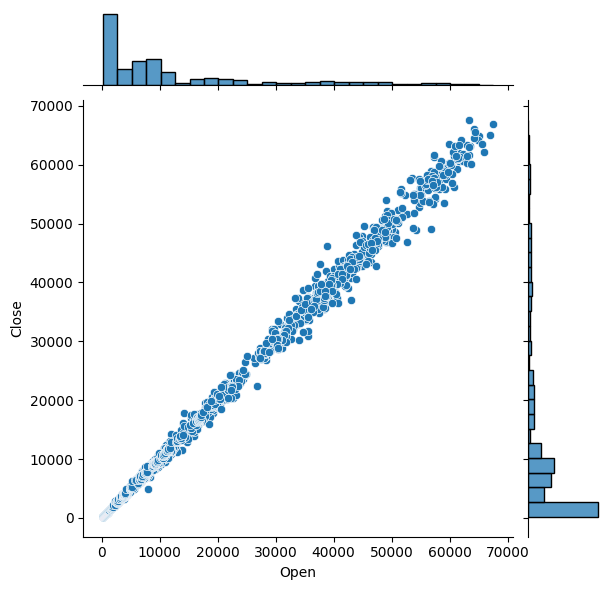

In [466]:
sns.jointplot(x="Open", y="Close", data=btc_df)

<Axes: xlabel='Open', ylabel='High'>

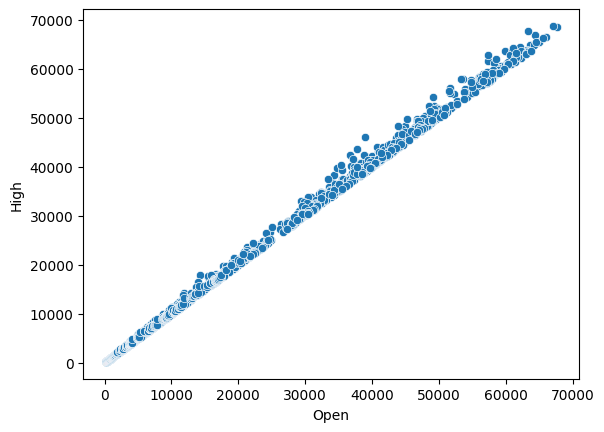

In [467]:
sns.scatterplot(x="Open", y="High", data=btc_df)

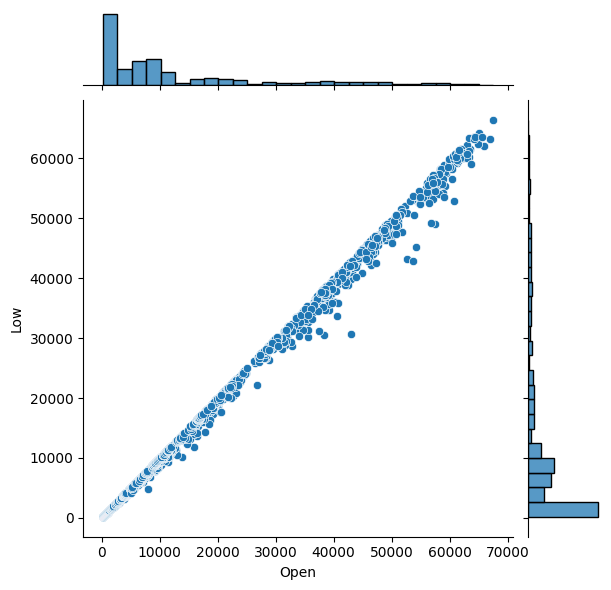

In [468]:
sns.jointplot(x="Open", y="Low", data=btc_df)

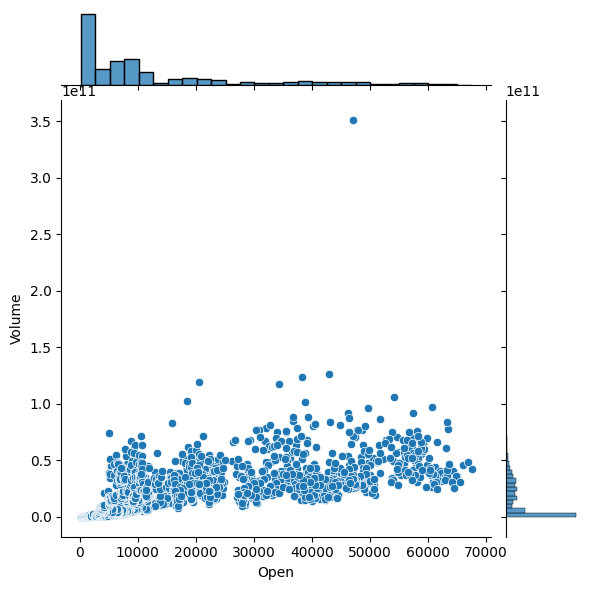

In [469]:
sns.jointplot(x="Open", y="Volume", data=btc_df)

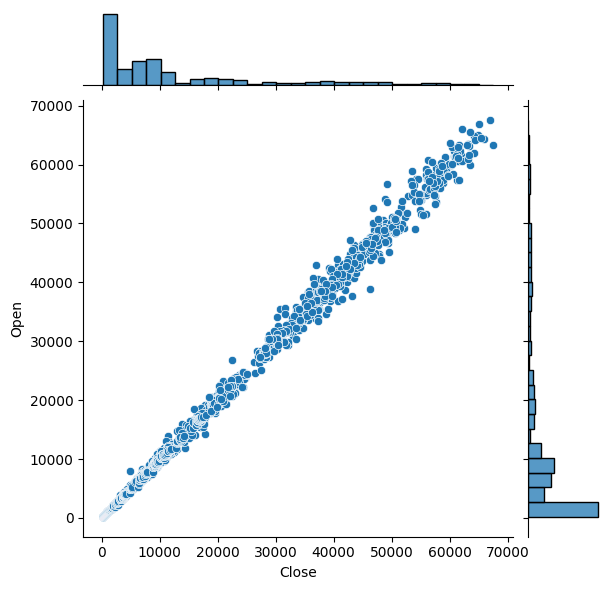

In [470]:
sns.jointplot(x="Close", y="Open", data=btc_df)

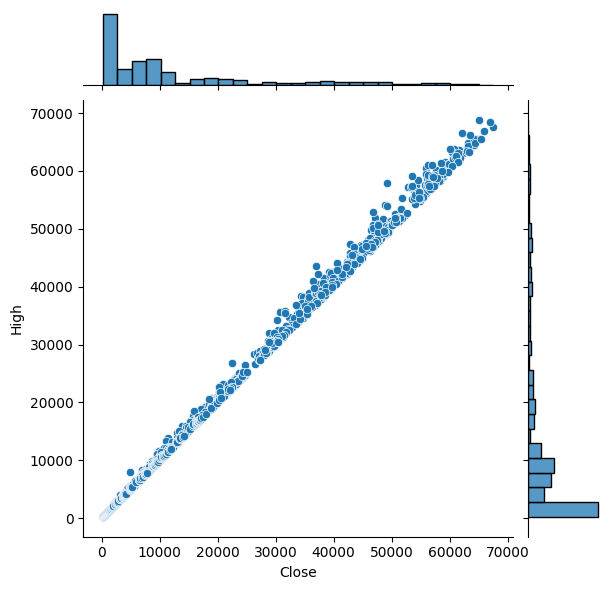

In [471]:
sns.jointplot(x="Close", y="High", data=btc_df)

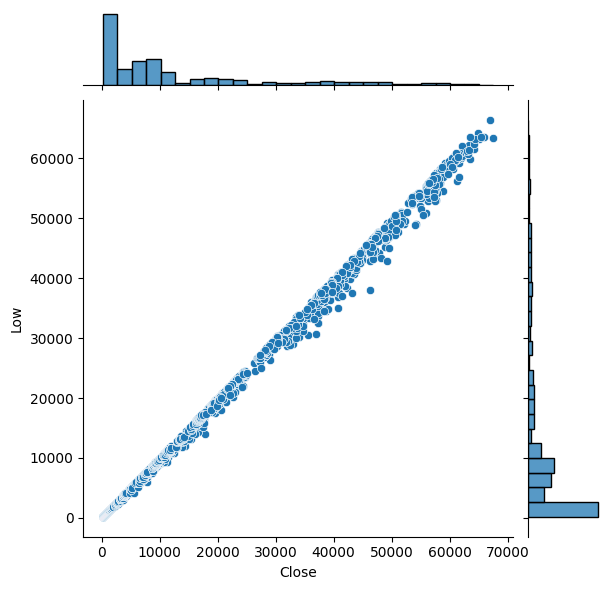

In [472]:
sns.jointplot(x="Close", y="Low", data=btc_df)

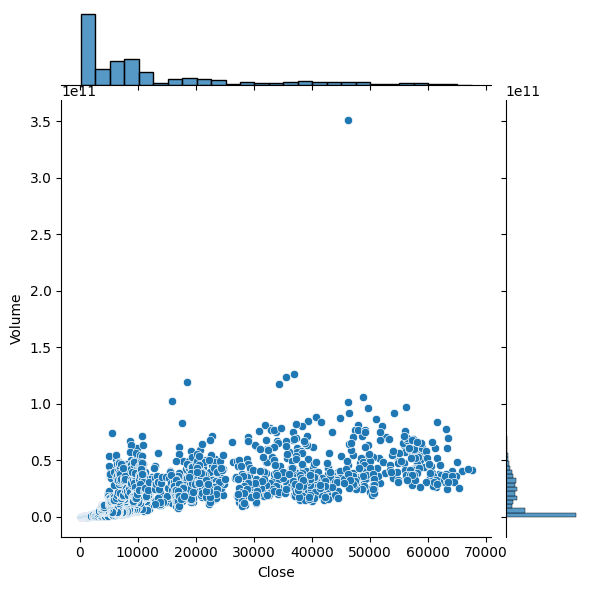

In [473]:
sns.jointplot(x="Close", y="Volume", data=btc_df)

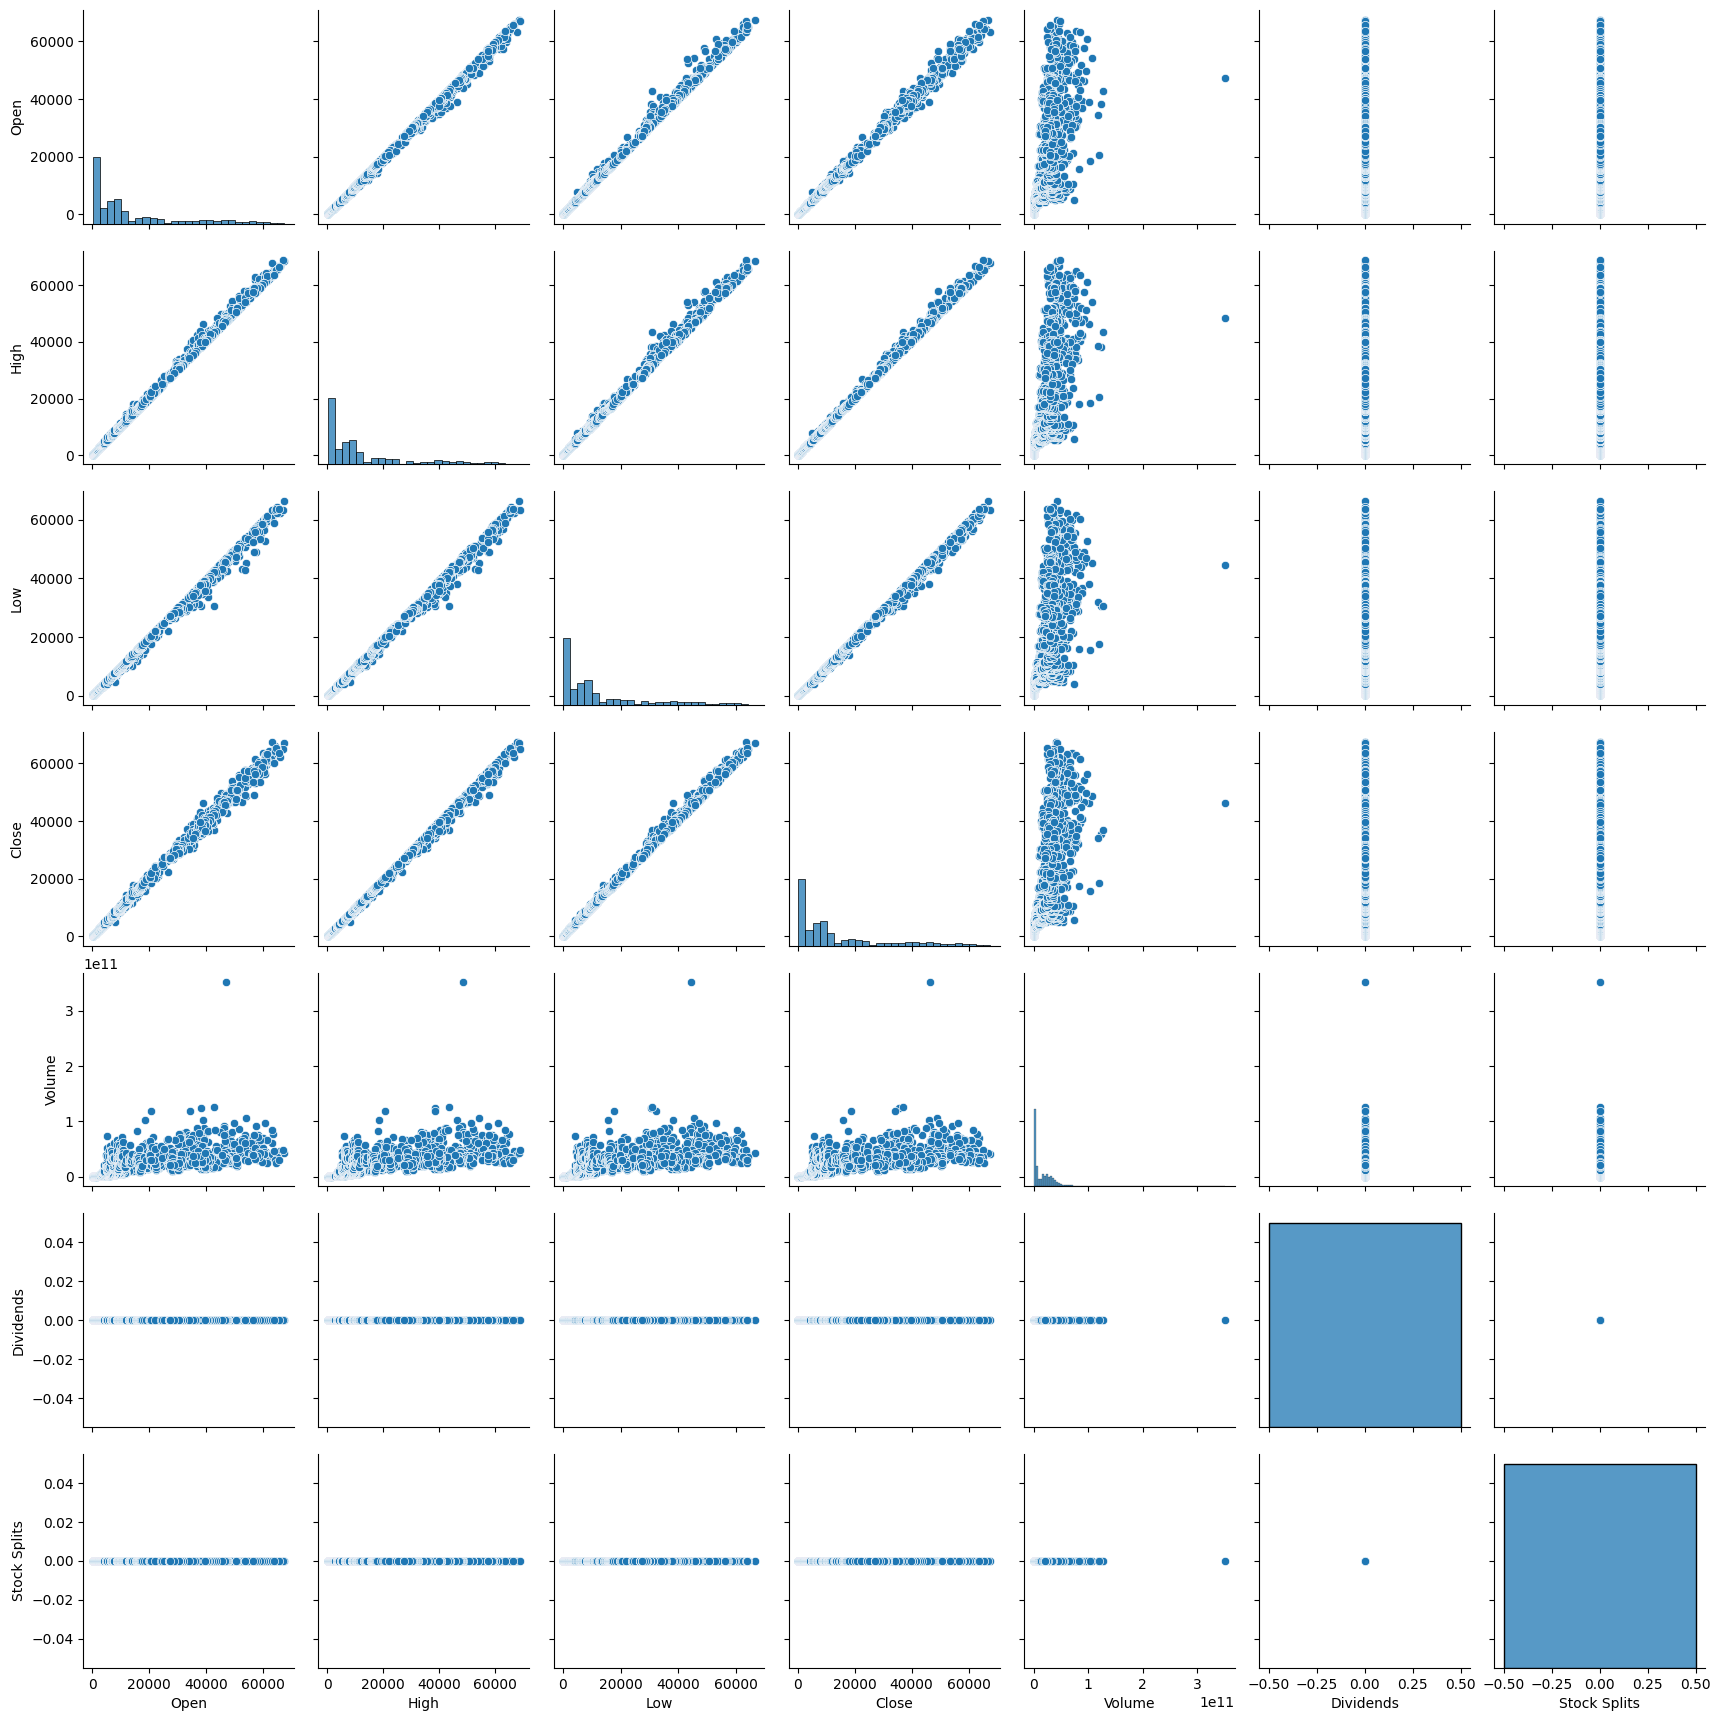

In [474]:
sns.pairplot(btc_df)

## Train and Test the model

In [475]:
X = btc_df[["Open", "High", "Low"]]

In [476]:
y = btc_df["Close"]

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [478]:
X_train.shape

(2197, 3)

In [479]:
regressor = LinearRegression(fit_intercept=True)

In [480]:
regressor.fit(X_train, y_train)

LinearRegression()

In [481]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-0.55729662  0.89215643  0.66133036]
Linear Model Coefficient (b):  1.7299536777918547


#### Now test the now trained model

In [482]:
y_pred = regressor.predict(X_test)

y_pred

array([ 6714.83773664,  1460.98284378,   312.90932834,   595.32145213,
         373.49799926, 10275.88438698,   260.12485199, 39952.47887433,
         433.60045687,   675.69248346,   241.02070655,  2494.78376831,
       23041.2300645 , 18882.45360393, 17452.28818079, 18861.14985129,
       49974.83719092,   608.12219877,  6454.63824357, 39445.9149775 ,
         389.28370453,   329.13000014,   964.12262545, 55371.59736604,
       46433.87061004, 48817.60096557, 10857.4644763 ,   418.220517  ,
       21121.33056063, 10444.99547894, 21455.92162125,   670.61523508,
        8498.12782118,  7496.98076352, 38060.11006803,   220.12466805,
        5728.9972593 , 46148.02878563,  4217.01863901,  4386.34777664,
        1070.16587004,  3938.02801068,   387.91616725,  8330.88475835,
        7704.09717641,  8719.76298249, 48524.60199153, 21030.82681564,
       18598.86624132,   386.15964048,   603.57404322, 17065.0343698 ,
       11056.60056759,   574.27356345, 21354.99349872, 11222.77271726,
      

In [483]:
y_test

Date
2018-04-01 00:00:00+00:00     6844.229980
2017-05-02 00:00:00+00:00     1452.819946
2014-12-30 00:00:00+00:00      310.737000
2016-08-07 00:00:00+00:00      592.690002
2016-01-31 00:00:00+00:00      368.766998
                                 ...     
2015-04-19 00:00:00+00:00      222.600006
2015-02-25 00:00:00+00:00      237.470001
2022-04-16 00:00:00+00:00    40424.484375
2016-03-13 00:00:00+00:00      414.065002
2021-06-15 00:00:00+00:00    40406.269531
Name: Close, Length: 942, dtype: float64

In [484]:
mean_squared_error(y_test, y_pred)

96032.23347305351

In [485]:
def predict_value(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    regressor = LinearRegression(fit_intercept=True)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return y_test, y_pred, regressor, mse

In [486]:
def optimize_test_size(data, X_params, y_params):
    size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    X = data[X_params]
    print(X)
    y = data[y_params]

    best = None
    best_size = None
    for sz in size:
        y_test, y_pred, regressor, mse = predict_value(X=X, y=y, test_size=sz)
        if best is None:
            best = mse
            best_size = sz
        if mse <= best:
            best = mse
            best_size = sz
    
    y_test, y_pred, regressor, mse = predict_value(X=X, y=y, test_size=best_size)
    return y_pred, y_test, best_size, mse, regressor

In [487]:
close_y_pred, close_y_test, close_best_size, close_mse, close_regressor = optimize_test_size(btc_df, ["Open", "High", "Low"], "Close")
open_y_pred, open_y_test, open_best_size, open_mse, open_regressor = optimize_test_size(btc_df, ["Close", "High", "Low"], "Open")
high_y_pred, high_y_test, high_best_size, high_open_mse, high_regressor = optimize_test_size(btc_df, ["Open", "Close", "Low"], "High")
low_y_pred, low_y_test, low_best_size, low_open_mse, low_regressor = optimize_test_size(btc_df, ["Open", "Close", "High"], "Low")

print(f'Best test sizes:\nClose Best Size: {close_best_size}\nOpen Best Size: {open_best_size}\nHigh Best Size: {high_best_size}\nLow Best Size: {low_best_size}')


                                   Open          High           Low
Date                                                               
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000
...                                 ...           ...           ...
2023-04-17 00:00:00+00:00  30317.146484  30319.197266  29275.371094
2023-04-18 00:00:00+00:00  29449.091797  30470.302734  29154.849609
2023-04-19 00:00:00+00:00  30394.187500  30411.054688  28669.898438
2023-04-20 00:00:00+00:00  28823.683594  29076.400391  28037.257812
2023-04-22 00:00:00+00:00  27274.150391  27312.804688  27230.128906

[3139 rows x 3 columns]
                                  Close          High           Low
Date                   

In [488]:
dld = yf.download("BTC-USD", start="2015-01-01", end="2023-04-21")

dld

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close   
Date                                                                 
2015-01-01    320.434998    320.434998    314.002991    314.248993  \
2015-01-02    314.079010    315.838989    313.565002    315.032013   
2015-01-03    314.846008    315.149994    281.082001    281.082001   
2015-01-04    281.145996    287.230011    257.612000    264.195007   
2015-01-05    265.084015    278.341003    265.084015    274.473999   
...                  ...           ...           ...           ...   
2023-04-16  30315.976562  30555.537109  30157.832031  30315.355469   
2023-04-17  30317.146484  30319.197266  29275.371094  29445.044922   
2023-04-18  29449.091797  30470.302734  29154.849609  30397.552734   
2023-04-19  30394.187500  30411.054688  28669.898438  28822.679688   
2023-04-20  28823.683594  29076.400391  28037.257812  28245.988281   

               Adj Close       Volume  
Date                                   
2015-01-01    314.248993      8036550  
2015-01-02    315.032013      7860650  
2015-01-03    281.082001     33054400  
2015-01-04    264.195007     55629100  
2015-01-05    274.473999     43962800  
...                  ...          ...  
2023-04-16  30315.355469  12854816417  
2023-04-17  29445.044922  17872186762  
2023-04-18  30397.552734  19480529496  
2023-04-19  28822.679688  24571565421  
2023-04-20  28245.988281  21340360360  

[3032 rows x 6 columns]

In [489]:
df = pd.DataFrame(dld)


# close_y_pred, close_y_test, close_best_size, close_mse, close_regressor = optimize_test_size(df, ["Open", "High", "Low"], "Close")
# open_y_pred, open_y_test, open_best_size, open_mse, open_regressor = optimize_test_size(df, ["Close", "High", "Low"], "Open")
# high_y_pred, high_y_test, high_best_size, high_open_mse, high_regressor = optimize_test_size(df, ["Open", "Close", "Low"], "High")
# low_y_pred, low_y_test, low_best_size, low_open_mse, low_regressor = optimize_test_size(df, ["Open", "Close", "High"], "Low")

# print(f'Best test sizes:\nClose Best Size: {close_best_size}\nOpen Best Size: {open_best_size}\nHigh Best Size: {high_best_size}\nLow Best Size: {low_best_size}')


In [492]:
# data = df[['Open', 'High', 'Low', 'Volume']]

for index, row in df.iterrows():
    # extract the features from the current row
    close_features = row[['Open', 'High', 'Low']].values.reshape(1, -1)
    open_features = row[['Close', 'High', 'Low']].values.reshape(1, -1)
    high_features = row[['Open', 'Close', 'Low']].values.reshape(1, -1)
    low_features = row[['Open', 'Close', 'High']].values.reshape(1, -1)
    
    # Predictions
    close_prediction_1 = close_regressor.predict(close_features)
    open_prediction = open_regressor.predict(open_features)
    high_prediction = high_regressor.predict(high_features)
    low_prediction = low_regressor.predict(low_features)
    
    # do something with the predictions, such as add them to new columns in the DataFrame
    df.loc[index, 'Close Prediction'] = close_prediction_1
    df.loc[index, 'Open Prediction'] = open_prediction
    df.loc[index, 'High Prediction'] = high_prediction
    df.loc[index, 'Low Prediction'] = low_prediction
    
    
for index, row in df.iterrows():
    # extract the features from the current row
    close_features = row[['Open', 'High', 'Low']].values.reshape(1, -1)
    open_features = row[['Close', 'High', 'Low']].values.reshape(1, -1)
    high_features = row[['Open', 'Close', 'Low']].values.reshape(1, -1)
    low_features = row[['Open', 'Close', 'High']].values.reshape(1, -1)
    
    # Predictions
    close_prediction_1 = close_regressor.predict(close_features)
    open_prediction = open_regressor.predict(open_features)
    high_prediction = high_regressor.predict(high_features)
    low_prediction = low_regressor.predict(low_features)
    
    # do something with the predictions, such as add them to new columns in the DataFrame
    df.loc[index, 'Close Prediction'] = close_prediction_1
    df.loc[index, 'Open Prediction'] = open_prediction
    df.loc[index, 'High Prediction'] = high_prediction
    df.loc[index, 'Low Prediction'] = low_prediction
    
    close_features = row[['Open Prediction', 'High Prediction', 'Low Prediction']].values.reshape(1, -1)
    close_prediction = close_regressor.predict(close_features)
    df.loc[index, 'Close Prediction 2'] = close_prediction
    
    df.loc[index, 'Avg Close Prediction'] = (close_prediction_1 + close_prediction) / 2



df


c:\Users\zichk\Desktop\CryptocurrencyPricePredictor\CryptoPredictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\zichk\Desktop\CryptocurrencyPricePredictor\CryptoPredictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\zichk\Desktop\CryptocurrencyPricePredictor\CryptoPredictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\zichk\Desktop\CryptocurrencyPricePredictor\CryptoPredictor\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\zichk\Desktop\CryptocurrencyPricePredictor\CryptoPredictor\lib\site-packages\sklearn\base.p

Open          High           Low         Close   
Date                                                                 
2015-01-01    320.434998    320.434998    314.002991    314.248993  \
2015-01-02    314.079010    315.838989    313.565002    315.032013   
2015-01-03    314.846008    315.149994    281.082001    281.082001   
2015-01-04    281.145996    287.230011    257.612000    264.195007   
2015-01-05    265.084015    278.341003    265.084015    274.473999   
...                  ...           ...           ...           ...   
2023-04-16  30315.976562  30555.537109  30157.832031  30315.355469   
2023-04-17  30317.146484  30319.197266  29275.371094  29445.044922   
2023-04-18  29449.091797  30470.302734  29154.849609  30397.552734   
2023-04-19  30394.187500  30411.054688  28669.898438  28822.679688   
2023-04-20  28823.683594  29076.400391  28037.257812  28245.988281   

               Adj Close       Volume  Close Prediction  Open Prediction   
Date                                                                       
2015-01-01    314.248993      8036550        319.203848       321.972480  \
2015-01-02    315.032013      7860650        318.215192       316.516436   
2015-01-03    281.082001     33054400        296.703013       317.432268   
2015-01-04    264.195007     55629100        274.896991       285.250941   
2015-01-05    274.473999     43962800        280.290651       274.238978   
...                  ...          ...               ...              ...   
2023-04-16  30315.355469  12854816417      30283.403075     30232.565543   
2023-04-17  29445.044922  17872186762      29511.116662     30002.564594   
2023-04-18  30397.552734  19480529496      30048.730348     29443.227017   
2023-04-19  28822.679688  24571565421      29171.328251     30118.637374   
2023-04-20  28245.988281  21340360360      28415.009672     28743.012937   

            High Prediction  Low Prediction  Close Prediction 2   
Date                                                              
2015-01-01       315.170954      320.611979          317.719881  \
2015-01-02       311.591883      319.766619          316.909767   
2015-01-03       300.147287      289.147262          286.672431   
2015-01-04       274.150210      267.503053          266.939711   
2015-01-05       267.784228      271.218345          269.502862   
...                     ...             ...                 ...   
2023-04-16     30810.035234    29814.188934        30344.926493   
2023-04-17     30523.366869    29167.196341        29801.695616   
2023-04-18     30669.367506    29299.963764        30325.064863   
2023-04-19     30360.193482    28580.582758        29219.611766   
2023-04-20     29122.126180    27791.353669        28346.037472   

            Avg Close Prediction  
Date                              
2015-01-01            318.461865  
2015-01-02            317.562479  
2015-01-03            291.687722  
2015-01-04            270.918351  
2015-01-05            274.896756  
...                          ...  
2023-04-16          30314.164784  
2023-04-17          29656.406139  
2023-04-18          30186.897606  
2023-04-19          29195.470008  
2023-04-20          28380.523572  

[3032 rows x 12 columns]

In [ ]:
df.to_csv('predictions_2.csv')    